In [105]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [106]:
dataset=pd.read_csv("winequality.csv")

In [107]:
dataset.shape

(1599, 12)

In [108]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [109]:
dataset.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

Text(0, 0.5, 'sulphates')

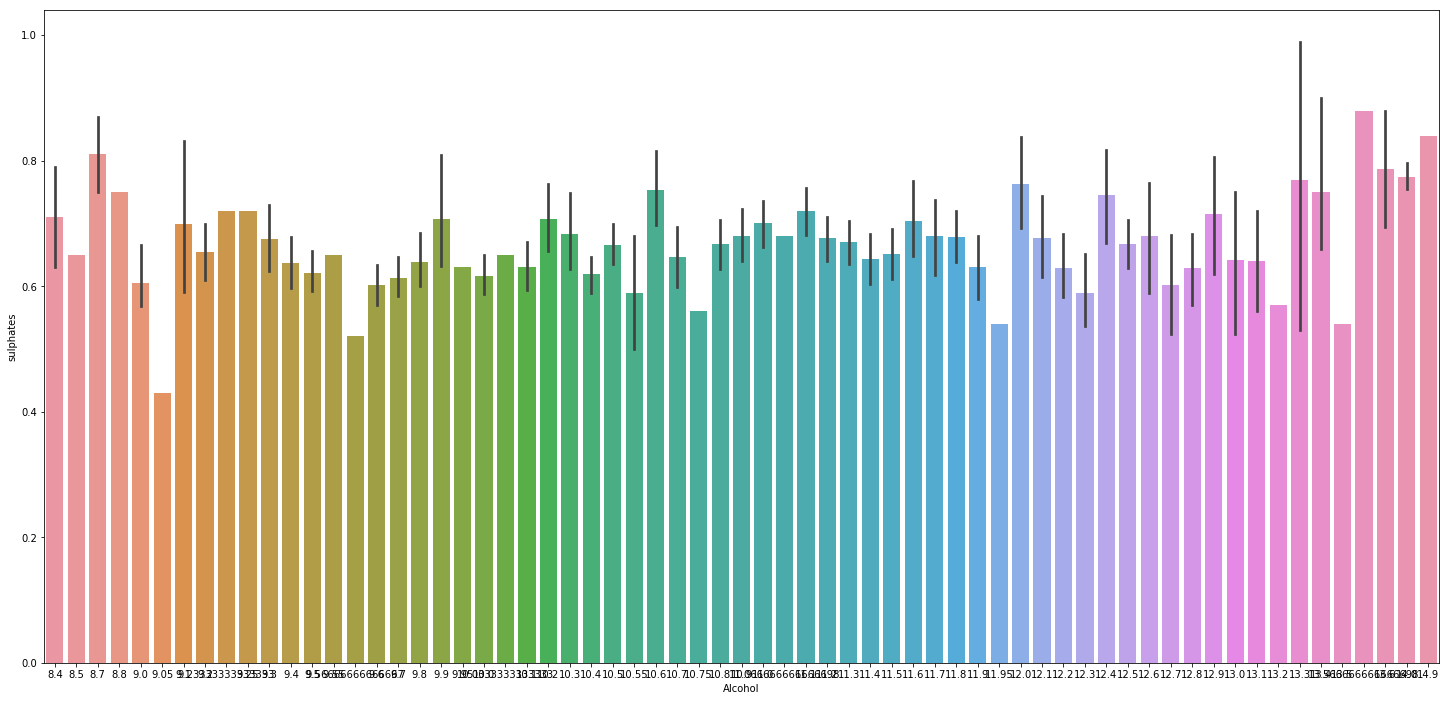

In [110]:
plt.figure(figsize=(25,12))
sns.barplot(x=dataset['alcohol'],y=dataset['sulphates'])
plt.xlabel('Alcohol')
plt.ylabel('sulphates')

In [111]:
alcohol_mean=dataset['alcohol'].mean()
print(alcohol_mean)
alcohol_median=dataset['alcohol'].median()
print(alcohol_median)

10.422983114446502
10.2


In [112]:
X=dataset.drop('quality',axis=1)
Y=dataset['quality']

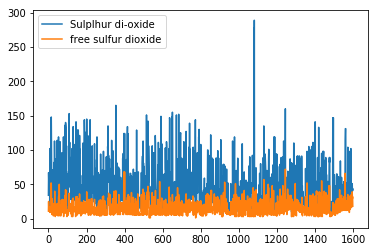

In [113]:
sns.lineplot(data=dataset['total sulfur dioxide'],label='Sulplhur di-oxide')
sns.lineplot(data=dataset['free sulfur dioxide'],label='free sulfur dioxide')

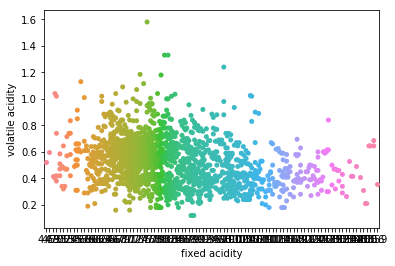

In [114]:
sns.swarmplot(x=dataset['fixed acidity'],y=dataset['volatile acidity'])

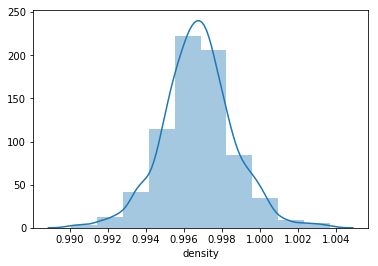

In [115]:
sns.distplot(dataset['density'],kde=True,bins=10)


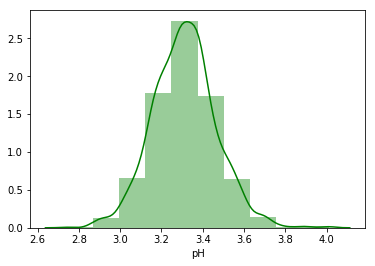

In [116]:
sns.distplot(dataset['pH'],kde=True,color='green',bins=10)

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

In [118]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [119]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [120]:
y_predict=model.predict(x_test)

In [121]:
df = pd.DataFrame({'  Actual Quality ': y_test, '   Predicted Quality': y_predict})
df1 = df.head(25)
print(df1)


        Actual Quality      Predicted Quality
236                   6              5.044746
1594                  5              5.544278
234                   6              4.616045
422                   5              5.067357
179                   5              5.305557
1371                  6              6.189849
195                   5              4.971661
614                   6              5.801032
216                   5              5.666689
1230                  6              6.470541
1375                  5              5.136486
798                   6              5.730950
891                   5              4.991769
1390                  6              6.175879
344                   6              5.866757
934                   5              5.521270
54                    6              5.612981
1037                  5              4.759090
151                   4              5.875857
233                   5              5.631866
657                   7           

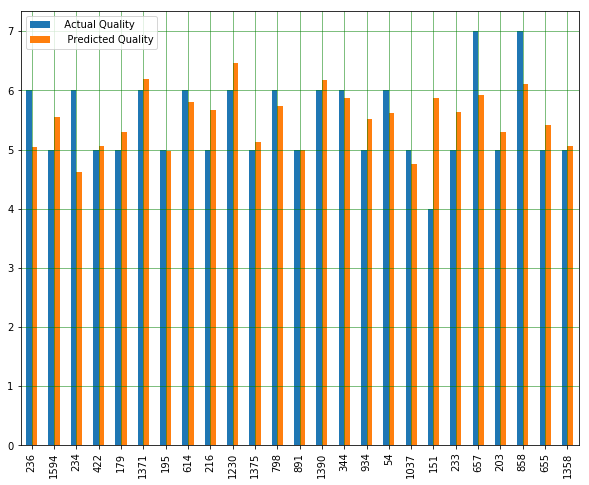

In [122]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [123]:
r2_score(y_test,y_predict)

0.35087989945418596

In [124]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 0.5161021378104478
Mean Squared Error: 0.4485457929152467
Root Mean Squared Error: 0.6697356141905899


In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [148]:
model1 = LogisticRegression(solver='lbfgs', multi_class='auto')
model1 = LogisticRegression()
model1.fit(x_train, y_train)
#print("Training set score:{:.3f} ".format(logregressor.score(x_train, y_train)))
#print("Test set score: {:.3f}".format(logregressor.score(x_test, y_test)))

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [149]:
#r2_score(y_test,y_predict)

In [150]:
logistic_regression_pred=logregressor.predict(x_test)

In [151]:
df = pd.DataFrame({'  Actual Quality ': y_test, '   Predicted Quality': logistic_regression_pred})
df1 = df.head(25)
print(df1)


        Actual Quality      Predicted Quality
236                   6                     5
1594                  5                     6
234                   6                     5
422                   5                     5
179                   5                     5
1371                  6                     6
195                   5                     5
614                   6                     5
216                   5                     6
1230                  6                     6
1375                  5                     5
798                   6                     6
891                   5                     5
1390                  6                     6
344                   6                     6
934                   5                     6
54                    6                     6
1037                  5                     5
151                   4                     7
233                   5                     6
657                   7           

In [152]:
r2_score(y_test,y_predict)

0.35087989945418596

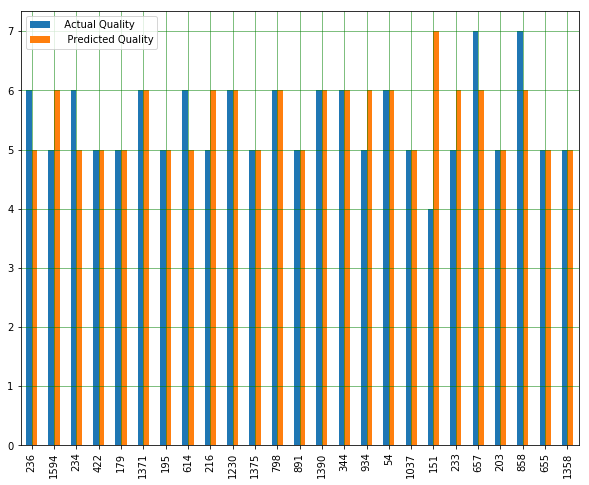

In [153]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()